In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('IMDB Dataset.csv')

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

Text Cleaning - 

Sample 10000 rows

Remove html tags

Remove special characters

Converting every thing to lower case

Removing Stop words

Stemming

In [5]:
df = df.sample(10000)

In [6]:
df.shape

(10000, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 20373 to 16823
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     10000 non-null  object
 1   sentiment  10000 non-null  object
dtypes: object(2)
memory usage: 234.4+ KB


In [8]:
df ['sentiment'].replace ({'positive' :1, 'negative' :0}, inplace=True)

In [9]:
df.head()

,review,sentiment
20373,Of life in (some) colleges. Of course there we...,1
36833,Film auteur Stephan Woloszczuk explores th...,1
36418,Much better than it is generally given credit ...,1
44438,I picked this title up from a friend who had i...,0
28644,Du Rififi Chez Les Hommes/Rififi(1955) can on ...,1


In [10]:
import re
clean = re.compile('<.*?>')
re.sub(clean,'',df.iloc[2].review)

'Much better than it is generally given credit for, this version of "Lost Horizon" not only had great music and beautiful scenery, but also some stunning mountain photography. A special edition laser disc was released some years ago which added more than 30 minutes of previously deleted material, extra music, and lots of bonus material. So why isn\'t this on DVD?! Hard to figure the studios out sometimes. Certainly the roles could have been given to people who could sing better than Peter Finch, Liv Ullman, George Kennedy and Sally Kellerman, but what do you want in a movie, good acting or melodious pipes? Song and dance man Bobby Van is great fun, Michael York is a suitably tragic villain, and seeing Sir John Gielgud decked out as Chang may sound silly but actually works very well on screen. Trust me, you need to check this movie out - if you can find it!'

In [11]:
# Function to clean html tags
def clean_htm1(text):
    clean = re.compile('<.*?>')
    return re. sub(clean,'',text)

In [12]:
df ['review']=df['review'].apply(clean_htm1)

In [13]:
# converting everything to lower
def convert_lower (text):
    return text.lower ()

In [14]:
df['review']=df['review'].apply (convert_lower)

In [15]:
# function to remove special characters
def remove_special(text):
    x=''
    for i in text:
        if i.isalnum():
            x = x+i 
        else:
            x = x + ' '
    return x

In [16]:
df['review'] = df['review'].apply(remove_special)

In [17]:
import nltk

In [18]:
from nltk.corpus import stopwords

In [19]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
def remove_stopwords(text):
    x=[]
    for i in text.split():
         
        if i not in stopwords.words('english'):
            x.append(i)
    y=x[:]
    x.clear()
    return y

In [21]:
df['review'] = df['review'].apply(remove_stopwords)

In [22]:
df

,review,sentiment
20373,"[life, colleges, course, artistic, licenses, t...",1
36833,"[film, auteur, stephan, woloszczuk, explores, ...",1
36418,"[much, better, generally, given, credit, versi...",1
44438,"[picked, title, friend, sitting, exhaustive, d...",0
28644,"[du, rififi, chez, les, hommes, rififi, 1955, ...",1
...,...,...
38263,"[reading, comments, struck, obvious, effect, w...",1
48042,"[considered, fashion, highlight, every, social...",0
3248,"[endearingly, silly, anime, six, episodes, dur...",1
20976,"[save, money, time, go, ahead, tell, movie, ab...",0


In [23]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [24]:
y=[]
def stem_words(text):
    for i in text:
        y.append(ps.stem(i))
    z=y[:]
    y.clear()
    return z

In [25]:
stem_words(['I', 'loved', 'loving', 'it' ])

['i', 'love', 'love', 'it']

In [26]:
df['review'] = df['review'].apply(stem_words)

In [27]:
df.head()

,review,sentiment
20373,"[life, colleg, cours, artist, licens, taken, s...",1
36833,"[film, auteur, stephan, woloszczuk, explor, de...",1
36418,"[much, better, gener, given, credit, version, ...",1
44438,"[pick, titl, friend, sit, exhaust, dvd, video,...",0
28644,"[du, rififi, chez, le, homm, rififi, 1955, sur...",1


In [28]:
def join_back(list_input):
    return" ".join (list_input)

In [29]:
df['review'] = df['review'].apply(join_back)

In [30]:
df['review']

20373    life colleg cours artist licens taken saw film...
36833    film auteur stephan woloszczuk explor depth lo...
36418    much better gener given credit version lost ho...
44438    pick titl friend sit exhaust dvd video laserdi...
28644    du rififi chez le homm rififi 1955 surfac desc...
                               ...                        
38263    read comment struck obviou effect wonder film ...
48042    consid fashion highlight everi social evil res...
3248     endearingli silli anim six episod durat haples...
20976    save money time go ahead tell movi absolut wor...
16823    movi sort similar better dead star one though ...
Name: review, Length: 10000, dtype: object

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 20373 to 16823
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     10000 non-null  object
 1   sentiment  10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 234.4+ KB


In [32]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000)

In [33]:
X = cv.fit_transform(df['review']).toarray()

In [34]:
X.shape

(10000, 10000)

In [35]:
X[0].max()

5

In [36]:
X[0].mean()

0.0127

In [37]:
y=df.iloc[:,-1].values

In [38]:
y.shape

(10000,)

In [39]:
y

array([1, 1, 1, ..., 1, 0, 1])

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [42]:
X_train.shape

(8000, 10000)

In [43]:
X_test.shape

(2000, 10000)

In [44]:
y_train.shape

(8000,)

In [45]:
y_test.shape

(2000,)

In [46]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [47]:
clf1 = GaussianNB()
clf2 = MultinomialNB()
clf3 = BernoulliNB()

In [48]:
clf1.fit(X_train,y_train)


GaussianNB()

In [49]:
clf2.fit(X_train,y_train)
clf3.fit(X_train,y_train)


BernoulliNB()

In [50]:
y_pred1=clf1.predict(X_test) 
y_pred2=clf2.predict(X_test) 
y_pred3 = clf3.predict(X_test)

In [51]:
y_test.shape

(2000,)

In [52]:
y_pred1.shape

(2000,)

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
print("Gaussian", accuracy_score(y_test,y_pred1))
print("Multinomial", accuracy_score(y_test,y_pred2))
print("Bernaulli", accuracy_score(y_test,y_pred3))
bernaulli_acc = accuracy_score(y_test,y_pred3)
multinomial_acc = accuracy_score(y_test,y_pred2)
gaussian_acc = accuracy_score(y_test,y_pred1)

Gaussian 0.6665
Multinomial 0.85
Bernaulli 0.8505


In [55]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train,y_train)

SVC()

In [56]:
Y_pred = classifier.predict(X_test)

In [57]:
print("SVM", accuracy_score(y_test,Y_pred))
svm_acc = accuracy_score(y_test,Y_pred)

SVM 0.868


In [60]:
import matplotlib.pyplot as plt


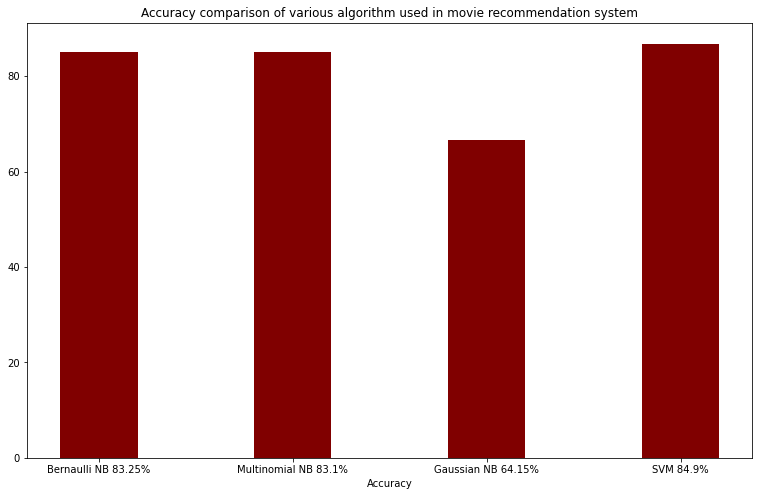

In [61]:
data = {'Bernaulli NB 83.25%':bernaulli_acc*100, 'Multinomial NB 83.1%':multinomial_acc*100, 'Gaussian NB 64.15%':gaussian_acc*100,
        'SVM 84.9%':svm_acc*100}
algorithm = list(data.keys())
acc_values = list(data.values())
  
fig = plt.figure(figsize = (13, 8))
 
# creating the bar plot
plt.bar(algorithm, acc_values, color ='maroon',width = 0.4)
 
plt.xlabel("Accuracy")
plt.title("Accuracy comparison of various algorithm used in movie recommendation system")
plt.show()